In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
layer1 = np.load('./output/snowmountain_layer1.npy')
layer2 = np.load('./output/snowmountain_layer2.npy')
layer3 = np.load('./output/snowmountain_layer3.npy')

In [16]:
l1 = np.zeros_like(layer1[0])
for ob in layer1:
    l1 += ob
l1 = l1 > 0

l2 = np.zeros_like(layer2[0])
for ob in layer2:
    l2 += ob
l2 = l2 > 0


l3 = np.zeros_like(layer2[0])
for ob in layer3:
    l3 += ob
l3 = l3 > 0

In [6]:
from tunnel_book.process_seg_img import downsample_image_opencv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


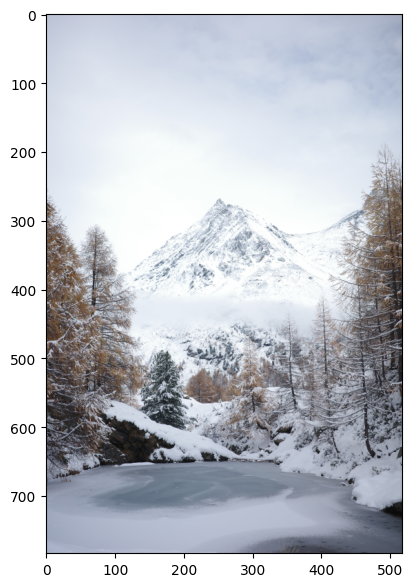

In [9]:
raw_image = cv2.imread('./dataset/snowmountain.JPG')
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2RGB) / 255.0
img_lr = downsample_image_opencv(raw_image, [784, 518])
plt.figure(figsize=(15,7))
plt.imshow(img_lr)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


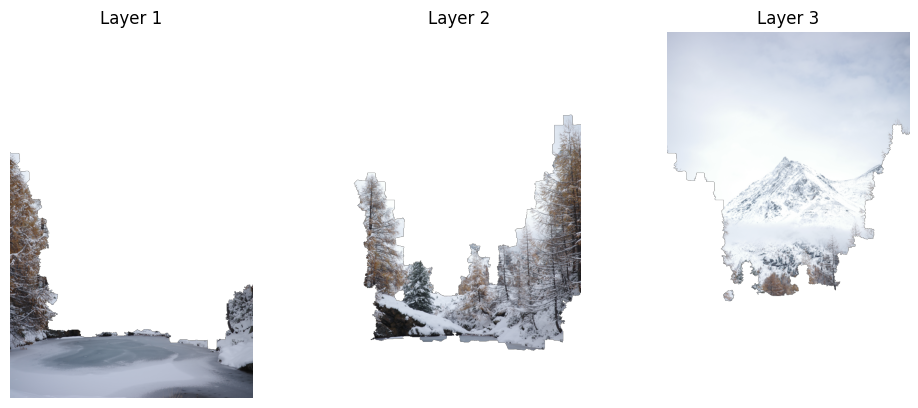

In [20]:
res_img = np.ones((img_lr.shape[0], img_lr.shape[1], 4), dtype=np.float32)
fig = plt.figure(figsize=(10, 8))
for i, group_mask in enumerate([l1, l2, l3]):
    ax = fig.add_subplot(2, 3, i + 1)
    for c in range(3):  # 遍历RGB通道
        res_img[:, :, c] = np.where(group_mask, img_lr[:, :, c], 0)
    res_img[:, :, 3] = np.where(group_mask, 1, 0)

    ax.imshow(res_img)
    ax.axis('off')
    ax.set_title(f'Layer {i+1}')

    plt.tight_layout()

In [21]:
with open('./output/snowmountain_layer1_l.npy', 'wb') as f:
  np.save(f,l1)

with open('./output/snowmountain_layer2_l.npy', 'wb') as f:
  np.save(f,l2)

with open('./output/snowmountain_layer3_l.npy', 'wb') as f:
  np.save(f,l3)